#  Анализ транзакций интернет-магазина товаров для дома и быта «Пока все ещё тут»

### Описание проекта и задачи:

### Цель: 
Оптимизировать процесс закупки для компании и определить актуальные для покупателей сопровождающие товары.

### Задачи:
* Выявить ключевые товарные категории;
* Определить основные и сопровождающие товары в рамках ключевых товарных категорий.

### Заказчик:
Менеджер проекта, отвечающий за актуальность товарного ассортимента

### Содержание:
1. [Предобработка данных](#start)
2. [Исследовательский анализ данных](#research)
3. [Проверка гипотез](#check)
4. [Выводы и рекомендации](#end)

##### Сопровождающие материалы:
* Ссылка на презентацию: https://drive.google.com/file/d/1I-3plck7G49fbPDfpudPEP4Y9QnphK7F/view?usp=sharing 
* Ссылка на дашборд (набор 2): https://public.tableau.com/profile/oksana2205#!/vizhome/ecom_final/dashboard?publish=yes


<a id='start'></a>
## 1. Предобработка данных: 

In [1]:
# импортируем библиотеки
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
import plotly.io as pio
pio.renderers
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузим датасет и взглянем на данные
local_path = 'C://Users//lenovo//Documents//Y.Praktikum//datasets//'
ecom_data = pd.read_csv(local_path + 'ecommerce_dataset.csv')
ecom_data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


#### Описание данных:
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

In [3]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [4]:
# скорректируем формат даты:
ecom_data['date']= pd.to_datetime(ecom_data['date'], format='%Y%m%d%H').astype('datetime64[D]')

In [5]:
print('Дубликатов в данных:', ecom_data.duplicated().sum())
# сразу удалим дубликаты, если такие встретятся:
ecom_data = ecom_data.drop_duplicates()

Дубликатов в данных: 966


In [6]:
# посмотрим есть ли пропуски в каком-либо столбце
ecom_data.isnull().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [7]:
ecom_data['order_id'] = ecom_data['order_id'].astype('str')
ecom_data.info()
ecom_data.to_csv('ecom_newest.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5771 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5771 non-null   datetime64[ns]
 1   customer_id  5771 non-null   object        
 2   order_id     5771 non-null   object        
 3   product      5771 non-null   object        
 4   quantity     5771 non-null   int64         
 5   price        5771 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 315.6+ KB


* Пропусков нет
* Дубликаты устранены
* Скорректирован формат даты

<a id='research'></a>
### 2. Исследовательский анализ данных

Посмотрим на период поступления данных:

In [8]:
print('Старт:', ecom_data[['date']].min(), '\nФиниш:', ecom_data[['date']].max());

Старт: date   2018-10-01
dtype: datetime64[ns] 
Финиш: date   2019-10-31
dtype: datetime64[ns]


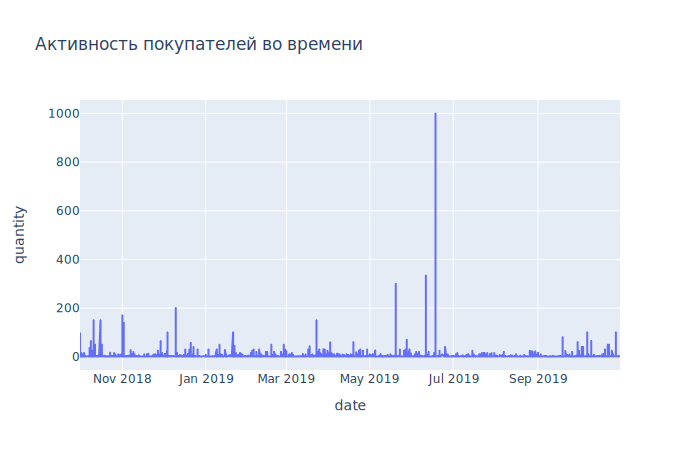

In [9]:
#и посмотрим на распределние числа покупок на таймлайне
fig = px.line(ecom_data, x='date', y='quantity', title='Активность покупателей во времени')
fig.show(renderer="svg")

Данные имеем с 1 октября 2018 года по 31 октября 2019 года. Наблюдается усиление активности в июне-июле 2019.

Теперь взглянем на разброс цен товаров:

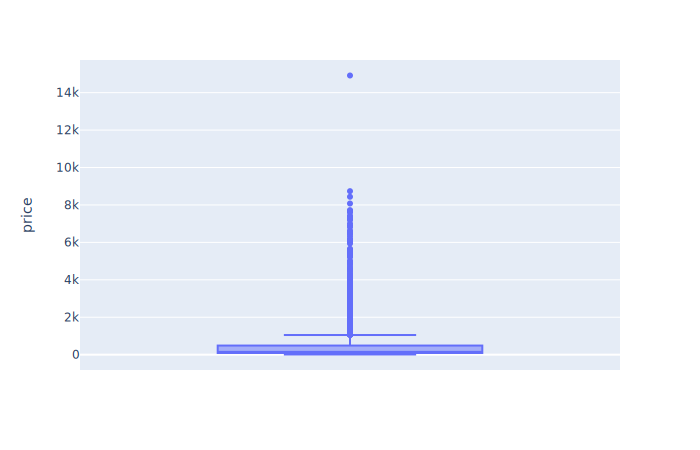

In [10]:
fig = px.box(ecom_data, y='price')
fig.show(renderer="svg")

In [11]:
print('Средняя цена товара: {:.2f} руб.'.format(ecom_data.price.mean()))

Средняя цена товара: 497.61 руб.


Цена большинства товаров лежит в рамках до 1050 рублей. Встречаются и довольно дорогие товары с максимальной ценой до 8737 рублей, однако это вполне реальная ситуация, выбросами высокие цены считать не будем.

Посмотрим на количество позиций в заказе:

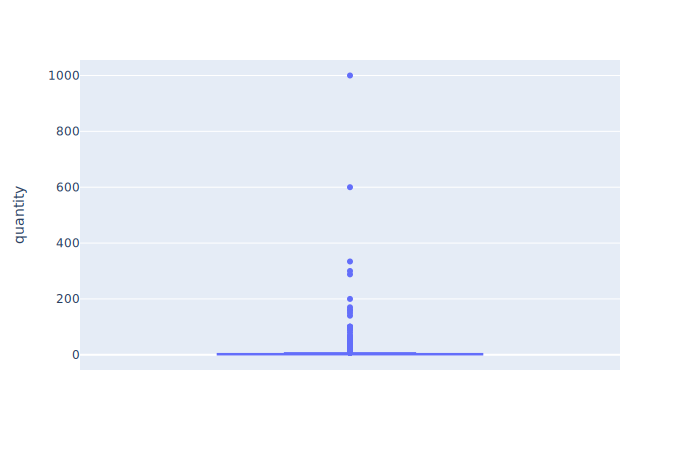

In [12]:
positions_per_order = ecom_data.groupby('order_id', as_index = False)['quantity'].sum() #кол-во позиций в каждом заказе
fig = px.box(positions_per_order, y='quantity')
fig.show(renderer="svg")

In [13]:
print('Наиболее распространенное кол-во позиций в заказе:', positions_per_order['quantity'].median())
one_pos_in_order = ecom_data.groupby('order_id', as_index=False)['quantity'].count().query('quantity==1')['order_id'].nunique()
all_orders_number = ecom_data.order_id.nunique()
print('Доля заказов с одной позицией: {:.2f}'.format(one_pos_in_order/all_orders_number))

Наиболее распространенное кол-во позиций в заказе: 1.0
Доля заказов с одной позицией: 0.80


Можем заметить, что встречаются также и выбросы - заказы, где встречается до 1000 товаров. Вероятно имели место оптовые закупки. Такие данные не помогут улучшить рекомендательную систему и систему закупки. Поэтому далее уберем из датасета 5% самых крупных заказов, которые с большой долей вероятности были оптовыми.

In [14]:
#positions_per_order.describe()
threshold = np.percentile(positions_per_order['quantity'], 95)
print('Граница выбросов по объему заказа:', np.percentile(positions_per_order['quantity'], 95)) #взяли 95% перцентиль

Граница выбросов по объему заказа: 20.0


In [15]:
positions_per_order = positions_per_order.query('quantity <= @threshold')
pure_orders_list = list(positions_per_order['order_id'])

In [16]:
ecom_data_old = ecom_data.copy()
ecom_data = ecom_data.query('order_id in @pure_orders_list') # отфильтровали оптовые заказы
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4419 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4419 non-null   datetime64[ns]
 1   customer_id  4419 non-null   object        
 2   order_id     4419 non-null   object        
 3   product      4419 non-null   object        
 4   quantity     4419 non-null   int64         
 5   price        4419 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 241.7+ KB


In [17]:
print('Размер датасета уменьшился на {:.2%}'.format((1 - len(ecom_data)/len(ecom_data_old))))

Размер датасета уменьшился на 23.43%


In [18]:
dub_data = ecom_data.groupby(['customer_id', 'order_id', 'product']).count().sort_values('date', ascending=False).head()

In [19]:
dub_data_orders = dub_data

Взглянем на названия товаров:

In [20]:
popular_products = ecom_data.groupby('product', as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)
popular_products.head(5)

,product,quantity
905,Пеларгония розебудная Red Pandora укорененный ...,87
1797,Цветок искусственный Гвоздика пластиковая один...,70
903,Пеларгония розебудная Prins Nikolai укорененны...,69
880,Пеларгония зональная диам. 12 см сиреневый пол...,68
862,Пеларгония зональная диам. 12 см красная махровая,65


In [21]:
# чаще всего первое или второе слово описывают тип товара
# напишем функцию, которая будет брать первое слово из названия товара,кроме случаев, когда первым идет прилагательное
# если первым идет прилагательное, то возьмем второе слово
ecom_data['product'] = ecom_data['product'].str.lower()
ecom_data['product_type'] = ecom_data['product'].apply(lambda x: x.split(' ', 2)[1] if (x.split(' ', 1)[0]).endswith('ное') or
                                                       (x.split(' ', 1)[0]).endswith('ная') or
                                                       (x.split(' ', 1)[0]).endswith('ный') or 
                                                       (x.split(' ', 1)[0]).endswith('нее') or
                                                       (x.split(' ', 1)[0]).endswith('няя') or
                                                       (x.split(' ', 1)[0]).endswith('ние')
                                                       else
                                                      x.split(' ', 1)[0])


In [22]:
#заменим все искусственные штуки на тип продукта декор - это не растения
mask = (ecom_data['product'].str.contains('полотен'))
ecom_data.loc[mask, 'product_type'] = 'полотенце'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('ковр')) 
ecom_data.loc[mask, 'product_type'] = 'коврик, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('чай')) 
ecom_data.loc[mask, 'product_type'] = 'посуда, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('круж')) 
ecom_data.loc[mask, 'product_type'] = 'кружки, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('фужер')) 
ecom_data.loc[mask, 'product_type'] = 'кружки, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('салат')) 
ecom_data.loc[mask, 'product_type'] = 'салатник, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('бокал')) 
ecom_data.loc[mask, 'product_type'] = 'кружки, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('столовы')) 
ecom_data.loc[mask, 'product_type'] = 'посуда, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('полотен')) 
ecom_data.loc[mask, 'product_type'] = 'полотенце, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('вешал')) 
ecom_data.loc[mask, 'product_type'] = 'вешалка, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('стакан')) 
ecom_data.loc[mask, 'product_type'] = 'кружки, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('посуд')) 
ecom_data.loc[mask, 'product_type'] = 'посуда, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('подар')) 
ecom_data.loc[mask, 'product_type'] = 'подарки, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('нож')) 
ecom_data.loc[mask, 'product_type'] = 'нож, набор'

mask = (ecom_data['product'].str.contains('набор')) & (ecom_data['product'].str.contains('салфет')) 
ecom_data.loc[mask, 'product_type'] = 'салфетка, набор'

mask = (ecom_data['product'].str.contains('комплект')) & (ecom_data['product'].str.contains('салфет')) 
ecom_data.loc[mask, 'product_type'] = 'салфетка, набор'

mask = (ecom_data['product'].str.contains('комплект')) & (ecom_data['product'].str.contains('полотен')) 
ecom_data.loc[mask, 'product_type'] = 'полотенце, набор'



In [23]:
# искусственные цветы не то же самое, что обычные цветы. Этот момент нужно исправить.

ecom_data['first_word'] = ecom_data['product'].apply(lambda x: x.split(' ', 2)[0])
ecom_data['second_word'] = ecom_data['product'].apply(lambda x: x.split(' ', 2)[1])

# заменим все искусственные штуки на тип продукта декор - это не растения
mask = (ecom_data['first_word']=='Искусственный') | (ecom_data['second_word']=='искусственный') 
ecom_data.loc[mask, 'product_type'] = 'декор'

#посмотрим на топ типов товаров
ecom_data.groupby('product_type')['quantity'].sum().sort_values(ascending=False).head() #полностью список выводить не будем в рамках отправки проекта

product_type
пеларгония       908
рассада          453
муляж            374
сушилка          339
сумка-тележка    259
Name: quantity, dtype: int64

Создадим словари категорий для топ-50 типов товаров:

In [24]:
plants = ['пеларгония', 'цветок', 'рассада', 'герань', 'петуния', 'растение', 'томата', 'роза',
         'циперус', 'бакопа', 'базилик', 'тимьян', 'примула', 'мята', 
         'дендробиум', 'фиалка', 'эвкалипт', 'бегония', 'калибрахоа', 'фуксия', 'лобелия', 'тюльпан', 'мимоза',
         'литопс', 'хлорофитум', 'каланхое', 'мединилла', 'мирт', 'лавр', 'хризолидокарпус',
         'радермахера', 'кашпо']# растения

dishes = ['тарелка', 'салатник', 'нож', 'блюдце', 'ложка', 'чайник', 'стакан', 'кружки', 'кружки, набор', 'посуда, набор',
         'салатник, набор', 'нож, набор', 'сковорода', 'мини-сковорода', 'крышка']# посуда

other = ['чехол', 'банка', 'подарки', 'набор', 'комплект', 'подарки, набор', 'стяжка'] # прочее

cleansing = ['ткань', 'щетка', 'веник', 'ведро', 'ёрш', 'полотенце', 'мыло', 'полотенце, набор',
            'доска', 'таз', 'сушилка'] # для уборки

instruments = ['сумка-тележка', 'тележка',
               'емкость', 'контейнер', 'кофр', 'стремянка', 'корзина'] #предметы для обслуживания дома

cozy_house = ['коврик', 'коврик, набор','штора', 'скатерть', 'карниз', 'салфетка', 'салфетка, набор', 'скатерть, набор',
              'полки', 'плечики', 'вешалка', 'салфетка, набор', 'вешалка, набор', 'муляж', 'композиция', 'декор'] #домашняя обстановка, интерьер


In [25]:
ecom_data['category'] = 'N/A'
mask = (ecom_data['product_type'].isin(plants)) 
ecom_data.loc[mask, 'category'] = 'растения'

mask = (ecom_data['product_type'].isin(dishes)) 
ecom_data.loc[mask, 'category'] = 'посуда'

#mask = (ecom_data['product_type'].isin(decor)) 
#ecom_data.loc[mask, 'category'] = 'декор'

mask = (ecom_data['product_type'].isin(other)) 
ecom_data.loc[mask, 'category'] = 'другое'

mask = (ecom_data['product_type'].isin(cleansing)) 
ecom_data.loc[mask, 'category'] = 'уборка'

mask = (ecom_data['product_type'].isin(instruments)) 
ecom_data.loc[mask, 'category'] = 'вспомогательные предметы'

mask = (ecom_data['product_type'].isin(cozy_house)) 
ecom_data.loc[mask, 'category'] = 'интерьер'

#mask = (ecom_data['product_type'].isin(repair)) 
#ecom_data.loc[mask, 'category'] = 'ремонт'

In [26]:
ecom_data.drop(['first_word', 'second_word'], axis=1, inplace=True)

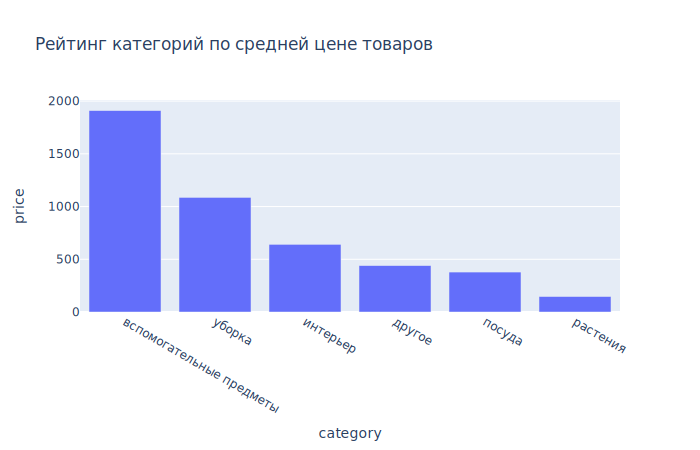

In [27]:
cat_grouped = ecom_data.query('category!="N/A"').groupby('category', as_index=False)['price'].mean().sort_values(by='price',
                                                                                                                ascending=False)
fig = px.bar(cat_grouped, x='category', y='price', title=('Рейтинг категорий по средней цене товаров'))
fig.show(renderer="svg")

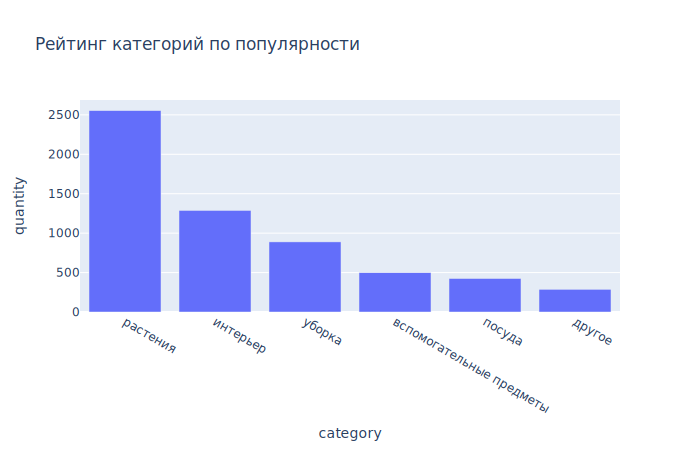

In [28]:
cat_grouped = ecom_data.query('category!="N/A"').groupby('category', as_index=False)['quantity'].sum().sort_values(by='quantity',
                                                                                                                ascending=False)
fig = px.bar(cat_grouped, x='category', y='quantity', title=('Рейтинг категорий по популярности'))
fig.show(renderer="svg")

На графиках выше представлены выделенные ключевые категории. Видим, что категория Вспомогательные предметы (куда входят вещи-помощники в быту, такие, как стремянки, емкости для хранения и проч.). Самой дешевой стала категория Декор.

##### Краткое описание категорий:
* Вспомогательные предметы: вещи-помощники в быту, такие, как стремянки, емкости для хранения и проч.
* Уборка: предметы для наведения чистоты и порядка (кухонные полотенца, ведра, веники и проч.)
* Интерьер: товары для внутреннего обустройства и создания интерьера (скатерти, шторы, коврики и проч.) + искусственный декор для дома (искусственные цветы, композиции и проч.)
* Другое: товары, которые не вошли ни в одну категорию (наборы инструментов для ремонта, подарки, чехлы, стяжки и проч.)
* Посуда: предметы кухонной утвари (посуда, тарелки, кружки и проч.)
* Растения: всевозможные виды домашних и уличных растений, а также кашпо


In [29]:
all_categories = ['растения', 'посуда', 'другое', 'вспомогательные предметы', 'уборка', 'интерьер']
# список всех категорий

Построим графики, чтобы посмотреть на самые дорогие и самые дешевые товары по категориям

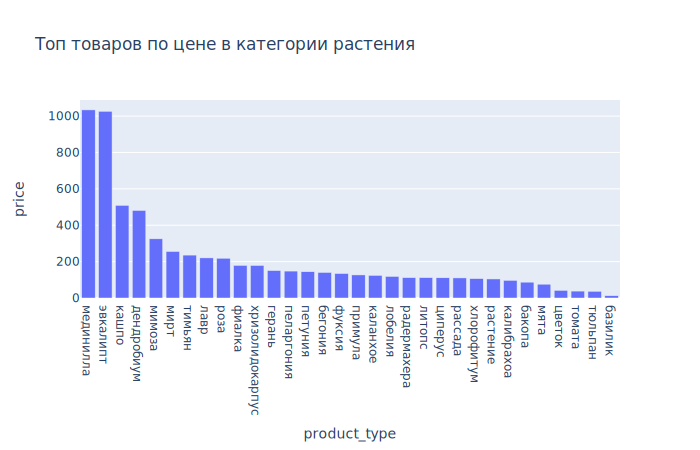

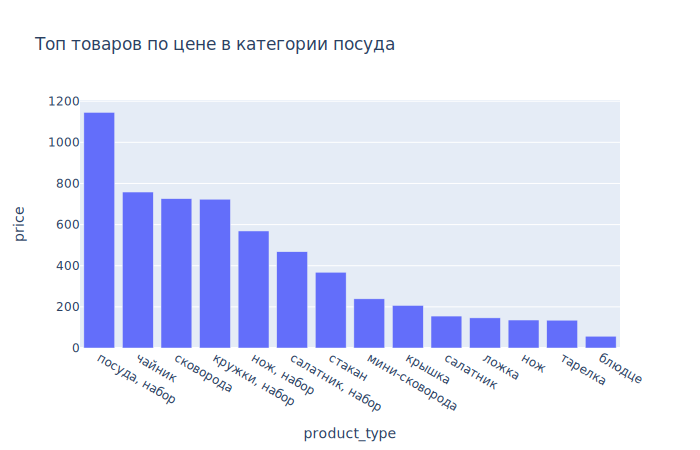

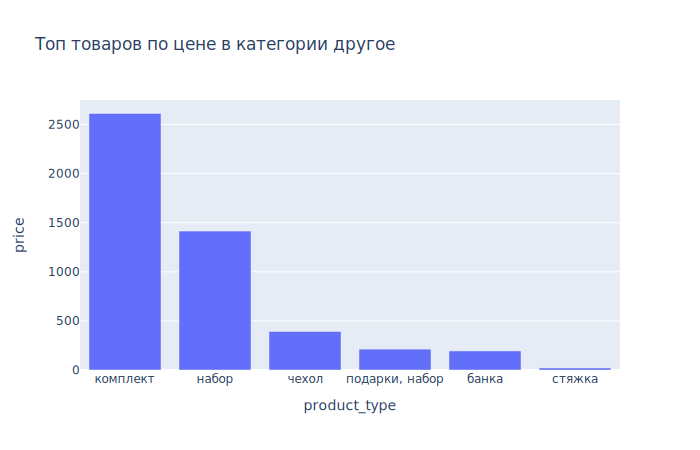

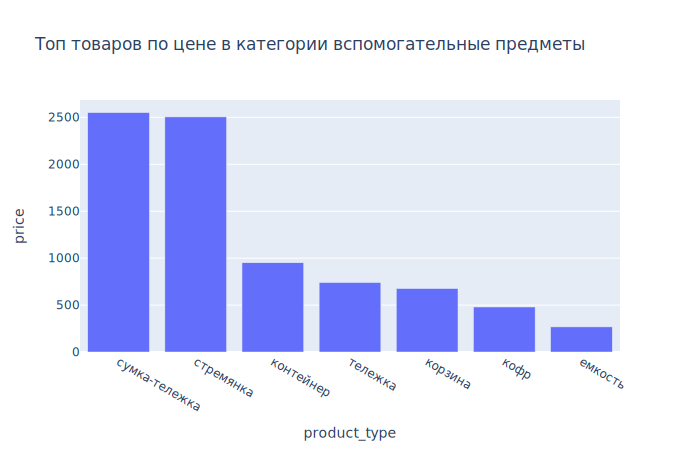

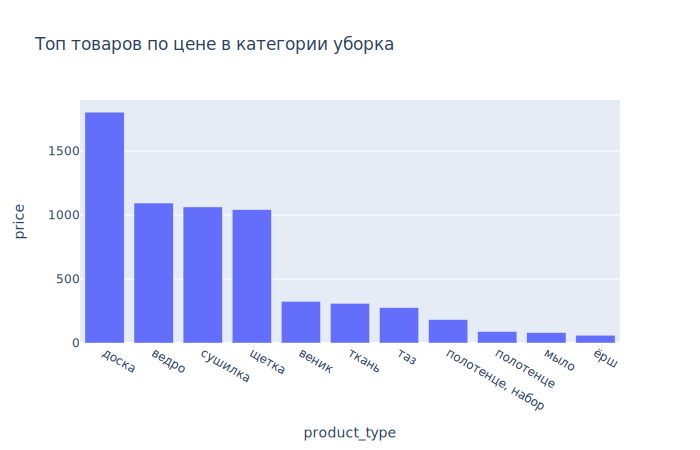

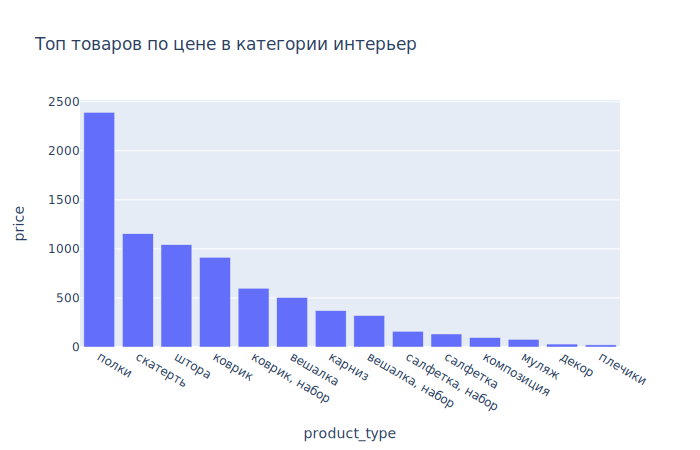

In [30]:
for cat in all_categories:
    now_data = (ecom_data.query('category == @cat')[['product_type', 'quantity',
                                                     'price']]).groupby('product_type',
                                                                        as_index=False)['price', 
                                                                                        'quantity'].mean().sort_values(by=
                                                                                                                       'price', ascending=False)
    fig = px.bar(now_data, x='product_type', y='price', title=('Топ товаров по цене в категории '+cat))
    fig.show(renderer="svg")
#тут будут графики по цене и количеству

Посмотрим на саме популярные категории

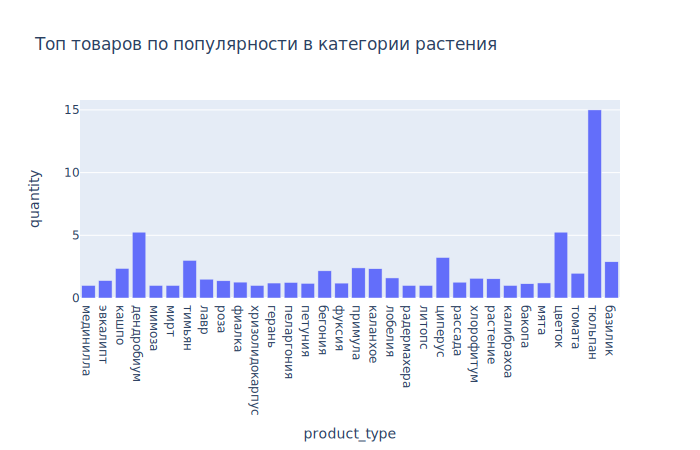

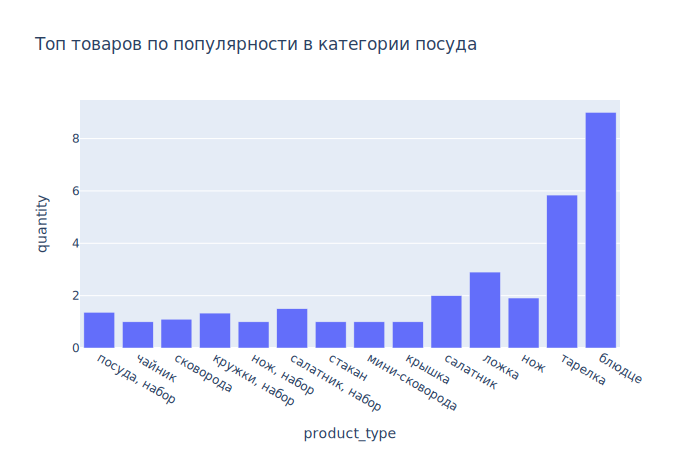

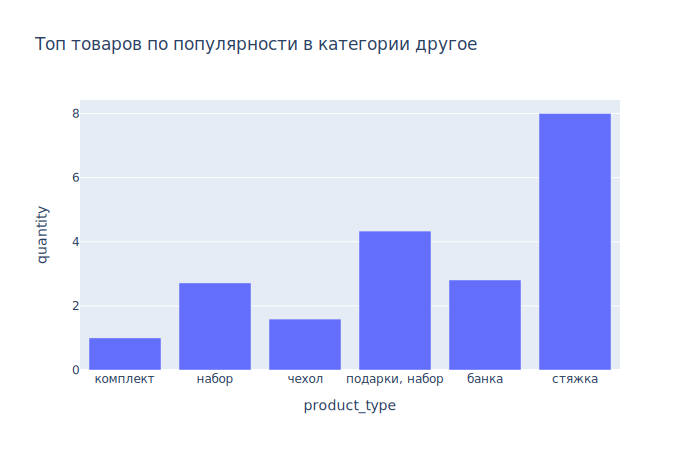

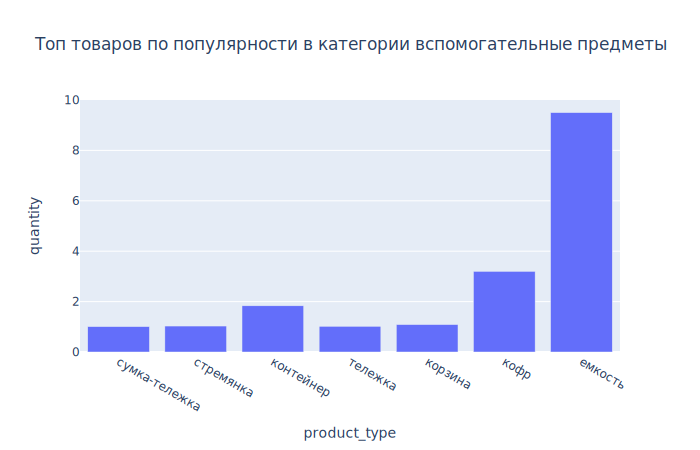

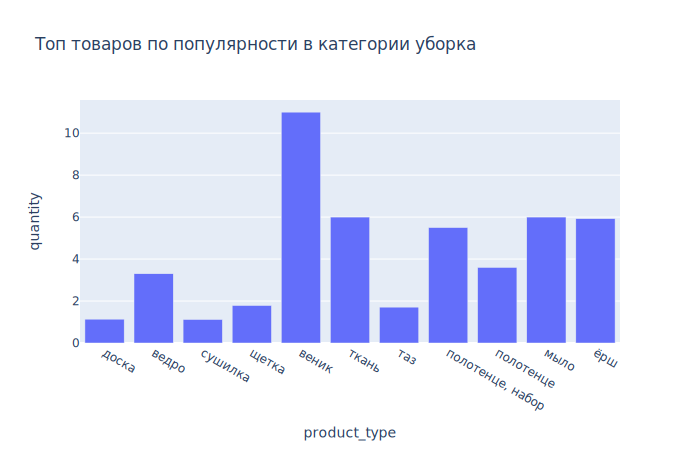

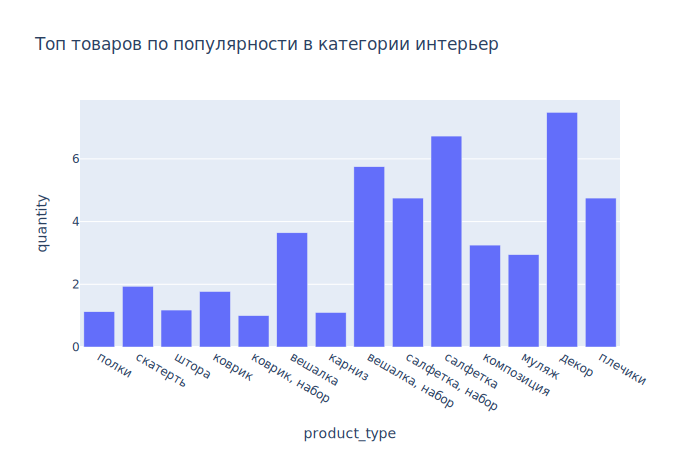

In [31]:
# построим графики, чтобы посмотреть на самые популярные товары по категориям

for cat in all_categories:
    now_data = (ecom_data.query('category == @cat')[['product_type', 'quantity', 'price']]).groupby('product_type', as_index=False)['price', 'quantity'].mean().sort_values(by='price', ascending=False)
    #print(now_data.head(3))
    fig = px.bar(now_data, x='product_type', y='quantity', title=('Топ товаров по популярности в категории '+cat))
    fig.show(renderer="svg")

Теперь нужно выявить основные и сопровождающие товары в каждой категории
Для начала посмотрим на разброс цен в каждой категории по типу товара:

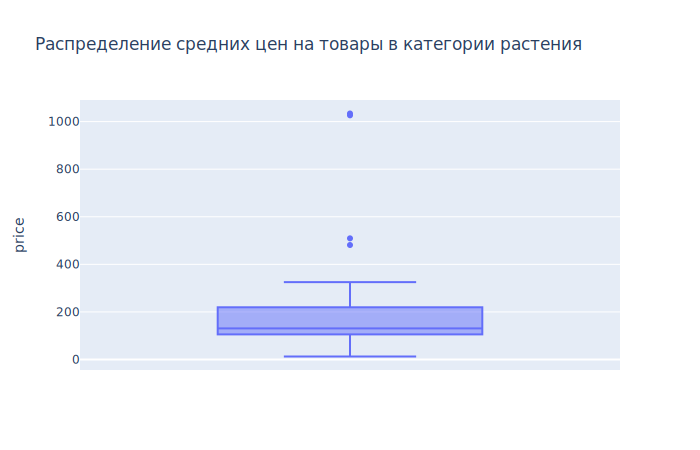

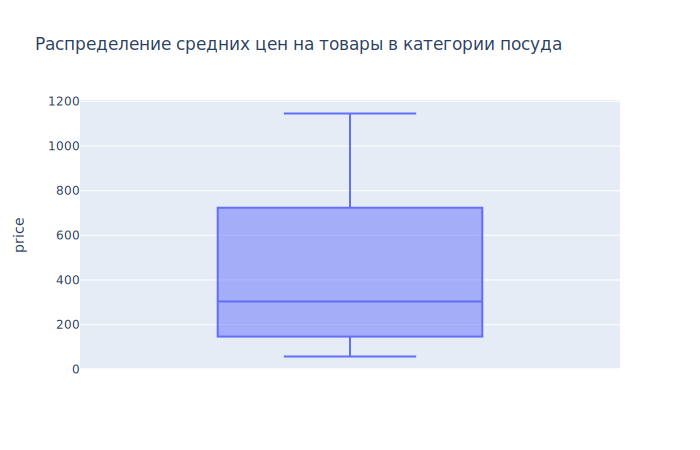

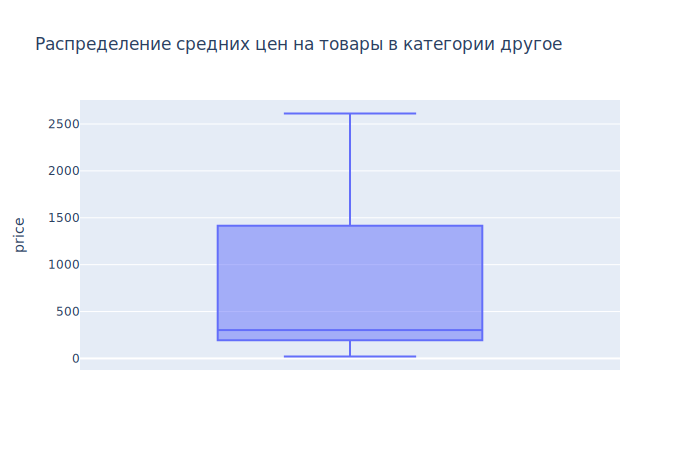

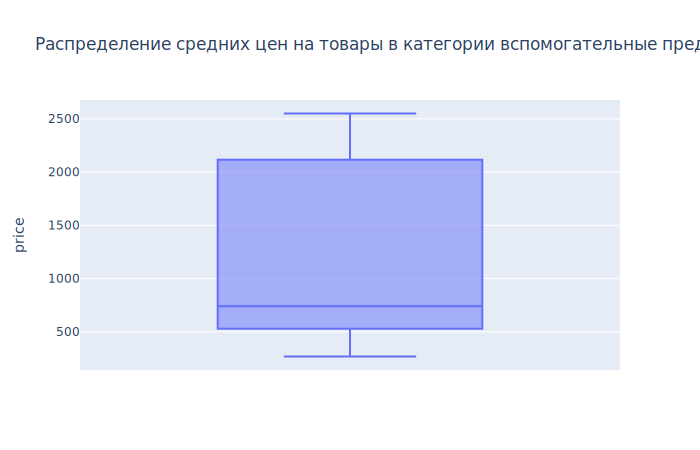

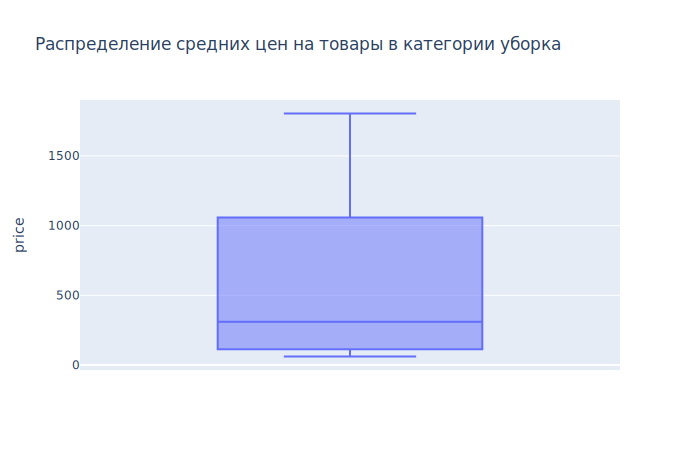

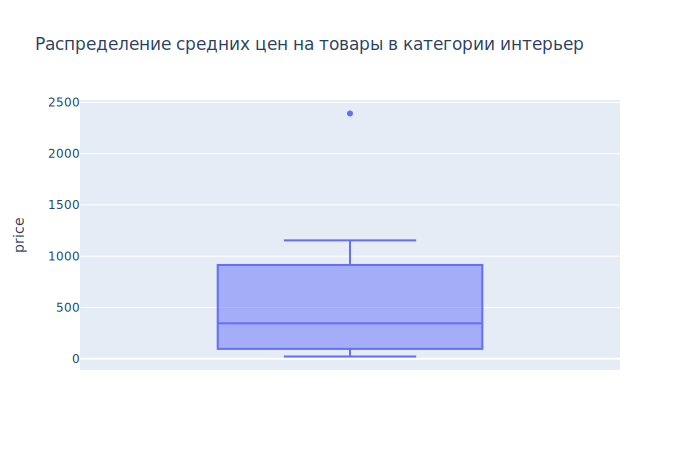

In [32]:
for cat in all_categories:
    now_data = (ecom_data.query('category == @cat')[['product_type', 'quantity', 'price']]).groupby('product_type', as_index=False)['price', 'quantity'].mean().sort_values(by='price', ascending=False)
    #print(now_data.head(3))в
    fig = px.box(now_data, y='price', title=('Распределение средних цен на товары в категории '+cat))
    fig.show(renderer="svg")

In [33]:
# создадим функцию, которая на основе ценового порога будет определять, оснвной товар или сопровождающий
def if_main(num, thresh):
    if num >= thresh:
        return 'yes'
    else:
        return 'no'

In [34]:
#возьмем товары, средняя цена которых выбивается за 75% перцентиль, как основные.
main_not_dict=[]
main_not_dict = pd.DataFrame(main_not_dict)
for cat in all_categories:
    now_data_mean_prices = ecom_data.query('category==@cat').groupby('product_type',
                                                as_index=False)['price'].mean()
    threshold = np.percentile(now_data_mean_prices['price'], 75) #зададим ценовой порог в 75%
    products = list(ecom_data.query('category==@cat')['product_type'].unique())
    now_data_mean_prices['main'] = now_data_mean_prices['price'].apply(lambda x: if_main(x, threshold))
    main_not_dict = main_not_dict.append(now_data_mean_prices)


    
main_not_dict.reset_index().drop('index', axis=1, inplace=True)     
main_not_dict.head()

,product_type,price,main
0,базилик,12.666667,no
1,бакопа,87.090909,no
2,бегония,140.500000,no
3,герань,150.842105,no
4,дендробиум,481.250000,yes


In [35]:
# присоединим столбец main к основному фрейму
ecom_data = ecom_data.merge(main_not_dict[['product_type', 'main']], how='left', on='product_type')
ecom_data.head()

,date,customer_id,order_id,product,quantity,price,product_type,category,main
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растение,растения,no
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растение,растения,no
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,радермахера,растения,no
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,хризолидокарпус,растения,no
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,циперус,растения,no


##### Вывод:
* 497 руб - средняя цена товара
* Большинство (80%) берут только один товар в рамках заказа - рекомендательную систему действительно стоит запускать
* Основные категории товаров: растения, посуда, другое, вспомогательные предметы, уборка, интерьер
* Растения - самая популярная и самая "дешевая" категория
* Вспомогательные товары - самая дорогая категория

<a id='check'></a>
### Проверка гипотез

* H0: средняя цена у основных и сопровождающих товаров одинакова
* H1: средняя цена у основных и сопровождающих товаров не одинакова

In [36]:
for cat in all_categories:

    sample_1 = ecom_data.query('category==@cat & main=="yes"')['price']
    sample_2 = ecom_data.query('category==@cat & main=="no"')['price']

    alpha = .05 # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

    results = st.ttest_ind(
        sample_1, 
        sample_2, equal_var=False)

    print('Категория', cat, ':', 'p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу. Средние цены не одинаковы")
    else:
        print("Не получилось отвергнуть нулевую гипотезу") 
    print()

Категория растения : p-значение: 1.3111105509249244e-09
Отвергаем нулевую гипотезу. Средние цены не одинаковы

Категория посуда : p-значение: 7.722533487423557e-14
Отвергаем нулевую гипотезу. Средние цены не одинаковы

Категория другое : p-значение: 0.059331927378028934
Не получилось отвергнуть нулевую гипотезу

Категория вспомогательные предметы : p-значение: 5.345300750847919e-46
Отвергаем нулевую гипотезу. Средние цены не одинаковы

Категория уборка : p-значение: 4.7159494232775724e-40
Отвергаем нулевую гипотезу. Средние цены не одинаковы

Категория интерьер : p-значение: 1.2382710982677457e-43
Отвергаем нулевую гипотезу. Средние цены не одинаковы



Статистический тест подтвердил, что во всех случаях средние цены для основных и сопровождающих товаров различны для всех категорий, кроме категории Другое, где небольшая выборка и ограниченный ассортимент. Туда вошли различные некатегоризируемые товары.

Теперь проверим, покупают ли вспомогательные товары определенной категории при покупке основного товара.

In [37]:
orders_grouped = ecom_data.pivot_table(index=['order_id','product', 'category', 'main']).reset_index().drop(['price', 'quantity'], axis=1)
orders_grouped.head(3)

,order_id,product,category,main
0,14480,многолетнее растение тимьян-чабрец розовый объ...,растения,no
1,14480,"рассада зелени для кухни базилик тонус, кассет...",растения,no
2,14480,рассада зелени для кухни мелиссы в горшке диам...,растения,no


In [38]:
unique_orders = list(orders_grouped['order_id'].unique())
orders_grouped_new = []
orders_grouped_new = pd.DataFrame(orders_grouped_new)
#orders_grouped = orders_grouped.set_index('order_id')
for order in unique_orders:
    now_data = orders_grouped.query('order_id == @order') #срез по определенному заказу
    if now_data['main'].nunique() > 1: #оставляем только заказы, где есть и основные и доп товары
        orders_grouped_new = orders_grouped_new.append(now_data)
orders_grouped_new.head(3)

,order_id,product,category,main
247,14559,"базилик смесь зеленого и фиолетового 0,4 г 466...",растения,no
248,14559,рассада зелени для кухни мята морокан диам. 9 см,растения,no
249,14559,рассада зелени для кухни розмарин блю лагун ди...,растения,no


In [39]:
unique_orders = list(orders_grouped_new['order_id'].unique())
same_add_category=[]
same_add_category = pd.DataFrame(same_add_category)
for order in unique_orders:
    now_data = orders_grouped_new.query('order_id == @order') #срез по определенному заказу
    no_positions = list(now_data.query('main=="no"')['category'].unique())  #в заказе список не основных категорий
    yes_positions = list(now_data.query('main=="yes"')['category'].unique())  #в заказе список основных категорий
    
    for pos in no_positions:
        if pos in yes_positions:
            now_data['same_category_additional'] = 1
        if pos not in yes_positions:
            now_data['same_category_additional'] = 0
        same_add_category = same_add_category.append(now_data)
same_add_category = same_add_category.query('main=="no"')
print('Доля сопровождающих товаров в заказе, которые относятся к категории основного товара: {:.2f}'.format(
    same_add_category['same_category_additional'].mean())) 
same_add_category.head()

Доля сопровождающих товаров в заказе, которые относятся к категории основного товара: 0.44


,order_id,product,category,main,same_category_additional
247,14559,"базилик смесь зеленого и фиолетового 0,4 г 466...",растения,no,1
248,14559,рассада зелени для кухни мята морокан диам. 9 см,растения,no,1
249,14559,рассада зелени для кухни розмарин блю лагун ди...,растения,no,1
250,14559,рассада зелени для кухни тимьян дюн валей диам...,растения,no,1
251,14559,рассада зелени для кухни тимьян сильвер кинг д...,растения,no,1


Т.е. среди заказов, в которых есть и основной, и сопровождающий товары, 44% дополнительных товаров относятся к той же категории, что основной. Иными словами: Если человек купил основной товар, то среди сопровождающих покупок примерно половина будет относиться к той же категории, что основная покупка. 

In [40]:
orders_with_add_category = list(same_add_category.query('same_category_additional == 1').order_id.
     unique()) #список всех заказов, где есть сопровождающий товар из той же категории, что основной
print('Доля заказов, где есть сопровождающий товар из категории основного заказа \n(среди заказов с основными+дополнительными товарами):{:.2f}'.format(len(orders_with_add_category)/len(orders_grouped_new.order_id.unique())))


Доля заказов, где есть сопровождающий товар из категории основного заказа 
(среди заказов с основными+дополнительными товарами):0.42


##### Вывод:

* Гипотеза о различии средних цен основных и дополнительных товаров подтвердилась для всех категорий, кроме Другое (где малое число объектов)
* В случае, если человек берет к основным товарам дополнительные, то 44% доп.товаров будет совпадать с категорией основного товара

<a id='end'></a>
### 4. Выводы и рекомендации:

В рамках работы:
* Данные были очищены от ценовых выбросов (оптовых заказов), приведены к нужным типам, проверены на пропуски и дубликаты;
* Были выделены основные категории товаров (растения, посуда, другое, вспомогательные предметы, уборка, интерьер);
* Внутри каждой категории были выделены основные и сопровождающие типы товаров на основе ценового порога;
* Была проверена гипотеза различия средней цены у основных и дополнительных товаров внутри каждой категории;
* Был проверен интерес покупателей к дополнительным товарам при покупке основного (44% берут дополнительные товары именно из той же категории, что основной).

Таким образом:
* Большинство посетителей (80%) покупают только один товар в заказе. Им вполне можно и нужно предлагать дополнительные товары;
* 52% дополнительных товаров относятся к той же категории, что основной товар (в заказах, где есть оба типа товаров);
* Дополнительные товары в каждой отдельной категории можно более активно предлагать покупателям;
